# Chapter 8

### 8E1.

For each of the causal relationships below, name a hypothetical third variable that would lead
to an interaction effect.

(1) Bread dough rises because of yeast.

(2) Education leads to higher income.

(3) Gasoline makes a car go.

1) temperature?
2) household income
3) uh...fuel efficiency of the car?

### 8E2.

Which of the following explanations invokes an interaction?

(1) Caramelizing onions requires cooking over low heat and making sure the onions do not
dry out.

(2) A car will go faster when it has more cylinders or when it has a better fuel injector.

(3) Most people acquire their political beliefs from their parents, unless they get them instead
from their friends.

(4) Intelligent animal species tend to be either highly social or have manipulative appendages
(hands, tentacles, etc.).

I thought it's 1 has an interaction. But apparently it seems 3 and 4 are as well. The reasons given seems to be that the combination of the two effects mentioned could vary and therefore the results will be changed -- i.e. the degree to which the specie of animals to be social and/or manipulative appendages could affect the intelligence. I'm not super convinced especially on 4. To me they seem to be independent effects. 

### 8E3.

For each of the explanations in 8E2, write a linear model that expresses the stated relationship.


Okay let's just do it for the yeast

$ \mu_i = \alpha + \beta_HH_i + \beta_MM_i+\beta_{HM}H_iM_i$
where M - moisture, H - heat


zero heat and zero dryness will imply $\alpha = 0$. Interaction will be positive as increasing heat will increase the impact of the moisture 

### 8M1.

Recall the tulips example from the chapter. Suppose another set of treatments adjusted the
temperature in the greenhouse over two levels: cold and hot. The data in the chapter were collected
at the cold temperature. You find none of the plants grown under the hot temperature developed
any blooms at all, regardless of the water and shade levels. Can you explain this result in terms of
interactions between water, shade, and temperature?

In [1]:
library(rethinking)
data(tulips)

Loading required package: rstan

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.7, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Loading required package: cmdstanr

This is cmdstanr version 0.5.3

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- Use set_cmdstan_path() to set the path to CmdStan

- Use install_cmdstan() to install CmdStan

Loading required package: parallel

rethinking (Version 2.21)


Attaching package: ‘rethinking’


The following object is masked from ‘package:rstan’:

    stan


The following object is masked from ‘package:stats’:

    rstudent




In [2]:
d = tulips

In [3]:
head(d)

,bed,water,shade,blooms
,<fct>,<int>,<int>,<dbl>
1,a,1,1,0.00
2,a,1,2,0.00
3,a,1,3,111.04
4,a,2,1,183.47
5,a,2,2,59.16
6,a,2,3,76.75


the model could now be 

$\mu_i = \alpha + \beta_WW_i + \beta_SS_i + \beta_TT_i + \beta_{WS}W_iS_i + \beta_{ST}S_iT_i + \beta_{WT}W_iT_i + \beta_{WST}W_iT_iS_i$

### 8M2.

Can you invent a regression equation that would make the bloom size zero, whenever the
temperature is hot?

The above equation shows the general interaction model. To be 0, we actually have to assume that the temperature is categorical and goes from 0 to 1, where 1 is the highest temperature. This is somewhat against my physicist instincts as I was thinking of in the limit of T -> infinity. Isolating the T

$\mu_i = \alpha + \beta_WW_i + \beta_SS_i + \beta_{WS}W_iS_i + \beta_TT_i + T_i( \beta_{ST}S_i + \beta_{WT}W_i + \beta_{WST}W_iS_i)$

This implies that the intercept must be $-\beta_TT_i$ and we must have a negative slope, and $\beta_{WST} = \beta_{WS}$ etc (i.e. all the interacting terms has to equal), so 
$\mu_i = -\beta_T + \beta_WW_i + \beta_SS_i + \beta_{WS}W_iS_i + \beta_TT_i - T_i( \beta_{S}S_i + \beta_{W}W_i + \beta_{WS}W_iS_i)$


### 8M4.

Repeat the tulips analysis, but this time use priors that constrain the effect of water to be positive and the effect of shade to be negative. Use prior predictive simulation. What do these prior
assumptions mean for the interaction prior, if anything?

In [4]:
str(d)

'data.frame':	27 obs. of  4 variables:
 $ bed   : Factor w/ 3 levels "a","b","c": 1 1 1 1 1 1 1 1 1 2 ...
 $ water : int  1 1 1 2 2 2 3 3 3 1 ...
 $ shade : int  1 2 3 1 2 3 1 2 3 1 ...
 $ blooms: num  0 0 111 183.5 59.2 ...


In [5]:
## R code 8.20
d$blooms_std <- d$blooms / max(d$blooms)
d$water_cent <- d$water - mean(d$water)
d$shade_cent <- d$shade - mean(d$shade)

So we need the effect of water to be positive, in this case, we can do Lognormal. 

Re-iterating the reasonings in the textbook -- the range of water and shade are both 2 units (-1 to 1), the range of blossom is 0 and 1. To take blossom from 0 to 1 we will need a slope of 1/2 = 0.5 (assume linear). If water is strictly positive and shade strictly negative, then the slope should be between 0 and 0.5 most of the time. 

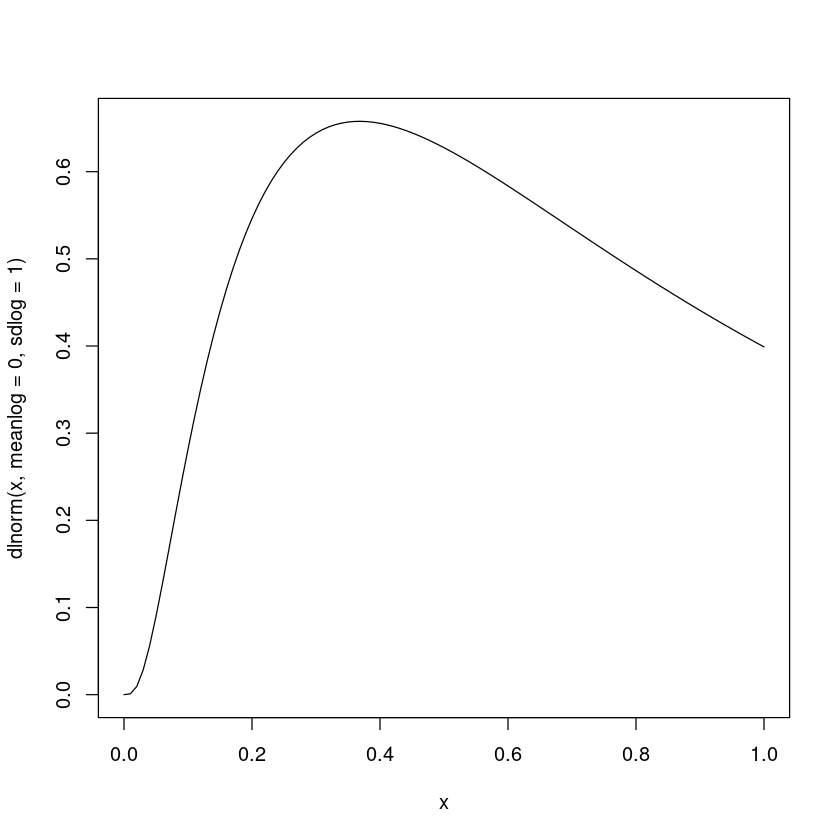

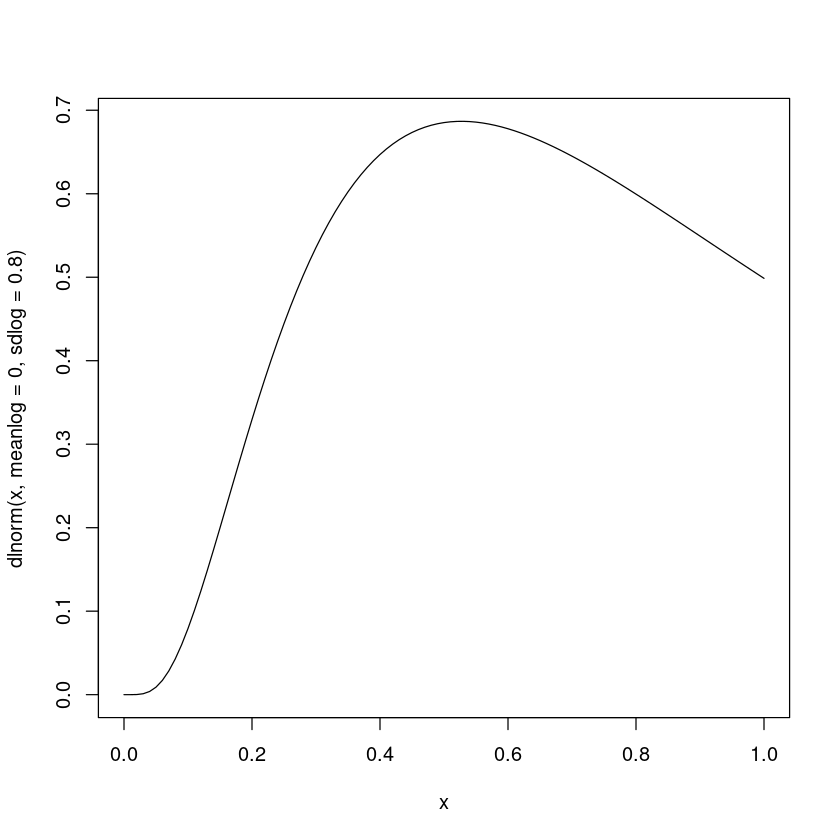

In [6]:
curve(dlnorm(x, meanlog= 0, sdlog = 1), from = 0, to=1)
curve(dlnorm(x, meanlog= 0, sdlog = 0.8), from = 0, to=1)

0.8 looks okay

in-terms of interaction strength, given they are opposite each other, I expect the same as the textbook, namely it should have similar strength as the main effect, so keep the same

In [7]:
m<- quap(
    alist(
        blooms_std ~ dnorm( mu , sigma ) ,
        mu <- a + bw*water_cent - bs*shade_cent + bws*water_cent*shade_cent ,
        a ~ dnorm( 0.5 , 0.25 ) ,
        bw ~ dlnorm( 0, 0.8  ) ,
        bs ~ dlnorm( 0, 0.8  ) ,
        bws ~ dnorm( 0 , 0.25 ) ,
        sigma ~ dexp( 1 )
    ) , data=d )


In [8]:
set.seed(1412)

prior <- extract.prior(m)

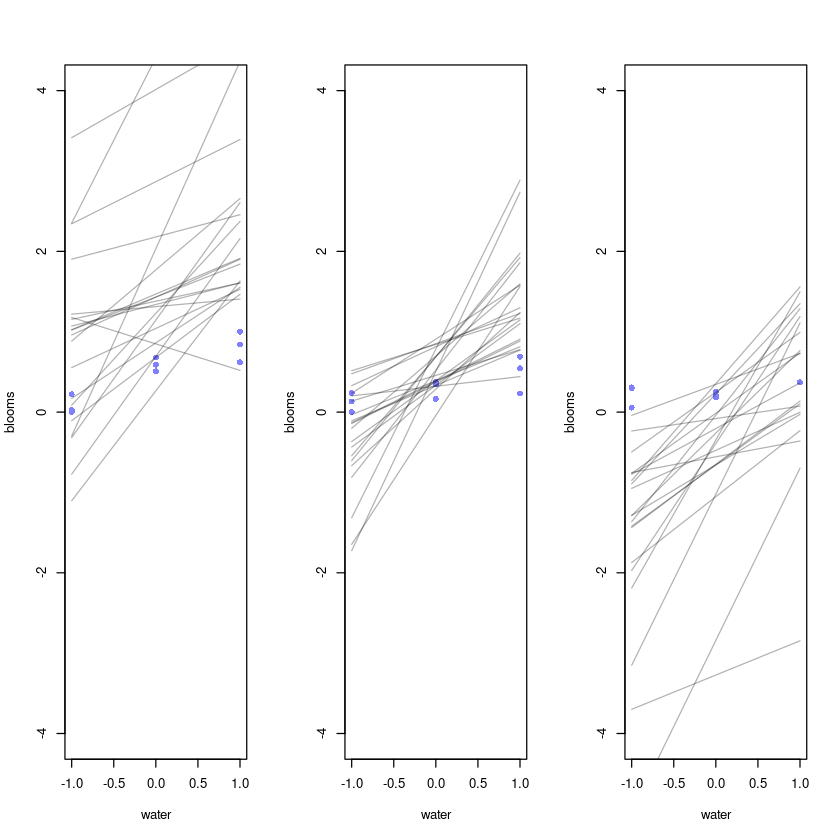

In [9]:
par(mfrow = c(1,3))
for (s in -1:1) {
    idx <- which(d$shade_cent == s)
    plot(d$water_cent[idx], d$blooms_std[idx], xlim=c(-1,1), ylim = c(-4,4), xlab = "water", ylab = "blooms", pch = 16, col=rangi2)
    mu <- link(m, data = data.frame(shade_cent = s, water_cent=-1:1), post=prior)
    for (i in 1:20) lines(-1:1, mu[i,], col=col.alpha("black", 0.3))
    }

so it seems when shade is -1, we have a lot of scattered lines, and water has a lot of influence (increases bloom to 4)  , but if shade is 0, then increasing water increases bloom but not as much. When shade is 1, most of the lines are scattering at the negative end, suggesting that it doesn't really matter if the water is high we will just not get bloom at all. 

So this means that we expect that low bloom but lots of water (i.e. lots of light and water) is a good recipe for growth, but if there isn't enough light (high shade) then water doesn't really help all that much. This seems to match our common sense

### 8H1.

Return to the data(tulips) example in the chapter. Now include the bed variable as a predictor in the interaction model. Don’t interact bed with the other predictors; just include it as a main
effect. Note that bed is categorical. So to use it properly, you will need to either construct dummy
variables or rather an index variable, as explained in Chapter 5.


#### Answer 

In [10]:
d$bed

[1] a a a a a a a a a b b b b b b b b b c c c c c c c c c
Levels: a b c

In [11]:
d$bed_id <- ifelse(d$bed=='a', 1, ifelse(d$bed=='b', 2, 3))

In [12]:
m_8h1<- quap(
    alist(
        blooms_std ~ dnorm( mu , sigma ) ,
        mu <- a[bed_id] + bw*water_cent + bs*shade_cent +bws*water_cent*shade_cent ,
        a[bed_id] ~ dnorm( 0.5 , 0.25 ) ,
        bw ~ dnorm( 0, 0.25  ) ,
        bs ~ dnorm( 0, 0.25  ) ,
        bws ~ dnorm( 0 , 0.25 ) ,
        sigma ~ dexp( 1 )
    ) , data=d )


In [13]:
m_book<- quap(
    alist(
        blooms_std ~ dnorm( mu , sigma ) ,
        mu <- a + bw*water_cent + bs*shade_cent +bws*water_cent*shade_cent ,
        a ~ dnorm( 0.5 , 0.25 ) ,
        bw ~ dnorm( 0, 0.25  ) ,
        bs ~ dnorm( 0, 0.25  ) ,
        bws ~ dnorm( 0 , 0.25 ) ,
        sigma ~ dexp( 1 )
    ) , data=d )


In [14]:
compare(m_book, m_8h1, func = WAIC)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m_8h1,-24.26080,9.744818,0.000000,NA,9.326450,0.6908795
m_book,-22.65233,10.195522,1.608468,7.900237,6.269434,0.3091205


looks like m_8h1 has better WAIC. Howeve the difference not significant as the dSE is very wide

In [15]:
precis(m_8h1, depth=2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a[1],0.2732636,0.03571213,0.21618868,0.33033846
a[2],0.3963989,0.03569469,0.33935188,0.45344590
a[3],0.4091117,0.03569363,0.35206635,0.46615699
bw,0.2074334,0.02537293,0.16688253,0.24798420
bs,-0.1138468,0.02536828,-0.15439021,-0.07330338
bws,-0.1438931,0.03099337,-0.19342646,-0.09435966
sigma,0.1081783,0.01469137,0.08469865,0.13165794


In [16]:
precis(m_book)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.3579834,0.02391908,0.31975614,0.39621075
bw,0.2067450,0.02923474,0.16002229,0.25346780
bs,-0.1134693,0.02922779,-0.16018097,-0.06675768
bws,-0.1431613,0.03568002,-0.20018485,-0.08613772
sigma,0.1248462,0.01694086,0.09777148,0.15192102


You can see that the bed indexed variables overlap each other (for 1,2,3). This means that the increase in predicative power is very limited as the parameters for three categories are very similar. If there's no meaningful differences between the three categories, then you might as well ignore them

### 8H3.

Consider again the data(rugged) data on economic development and terrain ruggedness,
examined in this chapter. One of the African countries in that example, Seychelles, is far outside
the cloud of other nations, being a rare country with both relatively high GDP and high ruggedness.
Seychelles is also unusual, in that it is a group of islands far from the coast of mainland Africa, and
its main economic activity is tourism.

(a) Focus on model m8.5 from the chapter. Use WAIC pointwise penalties and PSIS Pareto k
values to measure relative influence of each country. By these criteria, is Seychelles influencing the
results? Are there other nations that are relatively influential? If so, can you explain why?

(b) Now use robust regression, as described in the previous chapter. Modify m8.5 to use a
Student-t distribution with ν = 2. Does this change the results in a substantial way?

In [17]:
data(rugged)
d <- rugged

# make log version of outcome
d$log_gdp <- log( d$rgdppc_2000 )

# extract countries with GDP data
dd <- d[ complete.cases(d$rgdppc_2000) , ]

# rescale variables
dd$log_gdp_std <- dd$log_gdp / mean(dd$log_gdp)
dd$rugged_std <- dd$rugged / max(dd$rugged)


In [18]:
dd$cid <- ifelse( dd$cont_africa==1 , 1 , 2 )


In [19]:
m8.3 <- quap(
    alist(
        log_gdp_std ~ dnorm( mu , sigma ) ,
        mu <- a[cid] + b[cid]*( rugged_std - 0.215 ) ,
        a[cid] ~ dnorm( 1 , 0.1 ) ,
        b[cid] ~ dnorm( 0 , 0.3 ) ,
        sigma ~ dexp( 1 )
    ) , data=dd )

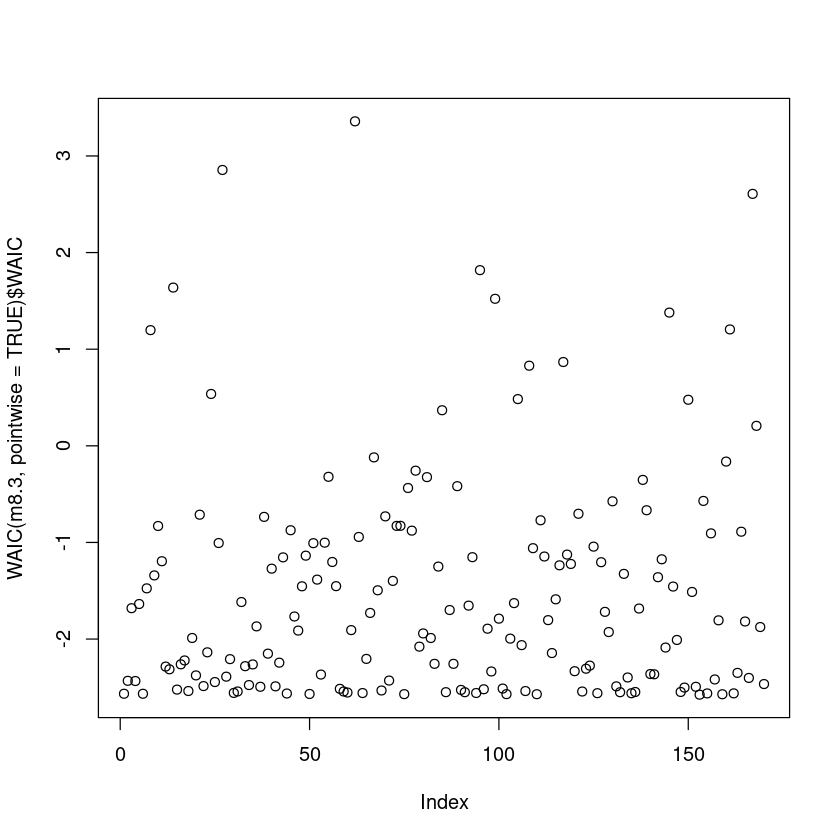

In [20]:
plot(WAIC(m8.3, pointwise=TRUE)$WAIC)

In [21]:
dd[dd$country == 'Seychelles', ]

,isocode,isonum,country,rugged,rugged_popw,rugged_slope,rugged_lsd,rugged_pc,land_area,lat,⋯,dist_slavemkt_atlantic,dist_slavemkt_indian,dist_slavemkt_saharan,dist_slavemkt_redsea,pop_1400,european_descent,log_gdp,log_gdp_std,rugged_std,cid
,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
199,SYC,690,Seychelles,4.885,1.802,11.129,1.278,54.101,46,-6.723,⋯,11.457,1.742,4.635,2.253,0,NA,9.795761,1.150126,0.7876491,1


index is 199

In [22]:
pen = WAIC(m8.3, pointwise=TRUE)$penalty

In [23]:
df <- data.frame(dd$country, pen)

In [24]:
df[order(-df$pen)[1:10], ]

,dd.country,pen
,<fct>,<dbl>
145,Seychelles,0.5415053
27,Switzerland,0.4637604
150,Tajikistan,0.3124520
93,Lesotho,0.2965671
62,Equatorial Guinea,0.2138946
8,Austria,0.1608782
118,Nepal,0.1286706
167,Yemen,0.1245834
24,Botswana,0.1101958


for sure Seychelles is penalized

In [25]:
psis_k = PSIS(m8.3, pointwise=TRUE)$k
df_psis = data.frame(dd$country, psis_k)

Some Pareto k values are high (>0.5). Set pointwise=TRUE to inspect individual points.



In [26]:
df_psis[order(-df_psis$psis_k)[1:10], ]

,dd.country,psis_k
,<fct>,<dbl>
145,Seychelles,0.6617320
93,Lesotho,0.4344281
144,Swaziland,0.3708719
143,Sweden,0.3169282
36,Cape Verde,0.2998356
116,Netherlands,0.2653090
3,United Arab Emirates,0.2540998
160,United States of America,0.2531690
26,Canada,0.2482219


a few interesting ones made the top 3, Seychelles is now out of top 3 and Nepal made the list

Now onto b

In [27]:
m_robust <- quap(
    alist(
        log_gdp_std ~ dstudent( 2, mu , sigma ) ,
        mu <- a[cid] + b[cid]*( rugged_std - 0.215 ) ,
        a[cid] ~ dnorm( 1 , 0.1 ) ,
        b[cid] ~ dnorm( 0 , 0.3 ) ,
        sigma ~ dexp( 1 )
    ) , data=dd )

In [28]:
pen = WAIC(m_robust, pointwise=TRUE)$penalty

In [29]:
df <- data.frame(dd$country, pen)

In [30]:
df[order(-df$pen)[1:10], ]

,dd.country,pen
,<fct>,<dbl>
145,Seychelles,0.29964267
93,Lesotho,0.27002376
150,Tajikistan,0.24855759
118,Nepal,0.15397354
27,Switzerland,0.13376530
133,Rwanda,0.13279025
144,Swaziland,0.12963476
84,Kyrgyzstan,0.12037553
36,Cape Verde,0.08671392


In [31]:
rugged_seq <- seq( from=-0.1 , to=1.1 , length.out=30 )

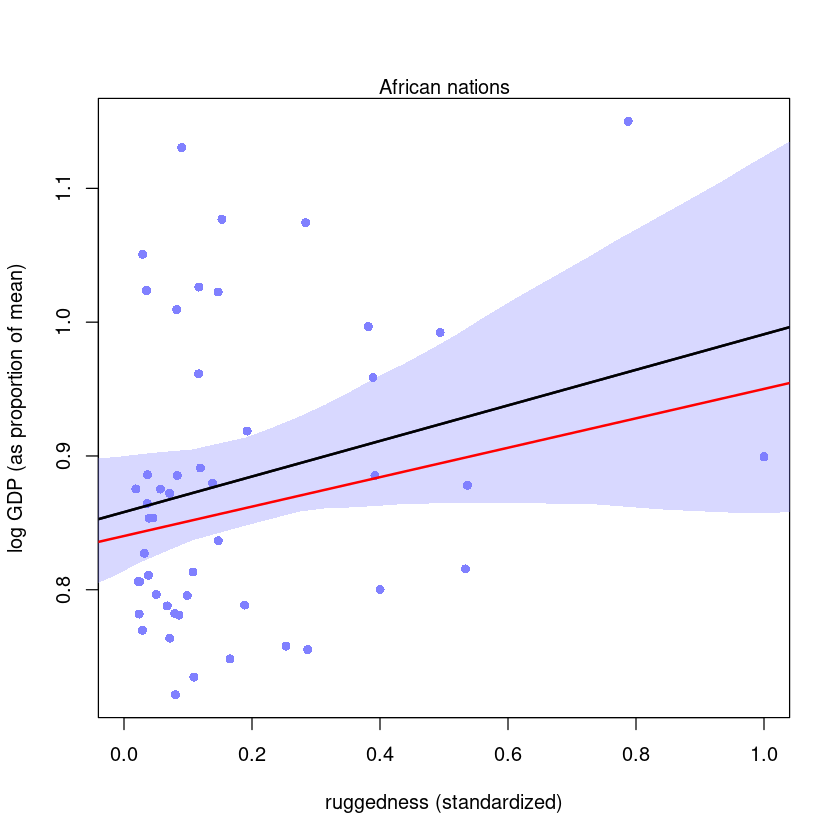

In [32]:
# plot Africa - cid=1
d.A1 <- dd[ dd$cid==1 , ]
plot( d.A1$rugged_std , d.A1$log_gdp_std , pch=16 , col=rangi2 ,
    xlab="ruggedness (standardized)" , ylab="log GDP (as proportion of mean)" ,
    xlim=c(0,1) )
mu <- link( m8.3 , data=data.frame( cid=1 , rugged_std=rugged_seq ) )
mu_mean <- apply( mu , 2 , mean )
mu_ci <- apply( mu , 2 , PI , prob=0.97 )
lines( rugged_seq , mu_mean , lwd=2 )
shade( mu_ci , rugged_seq , col=col.alpha(rangi2,0.3) )
mu_r <- link( m_robust , data=data.frame( cid=1 , rugged_std=rugged_seq ) )
mu_mean_r <- apply( mu_r , 2 , mean )
mu_ci_r <- apply( mu_r , 2 , PI , prob=0.97 )
lines( rugged_seq , mu_mean , lwd=2 )
lines( rugged_seq , mu_mean_r , lwd=2, col = 'red' )
mtext("African nations")


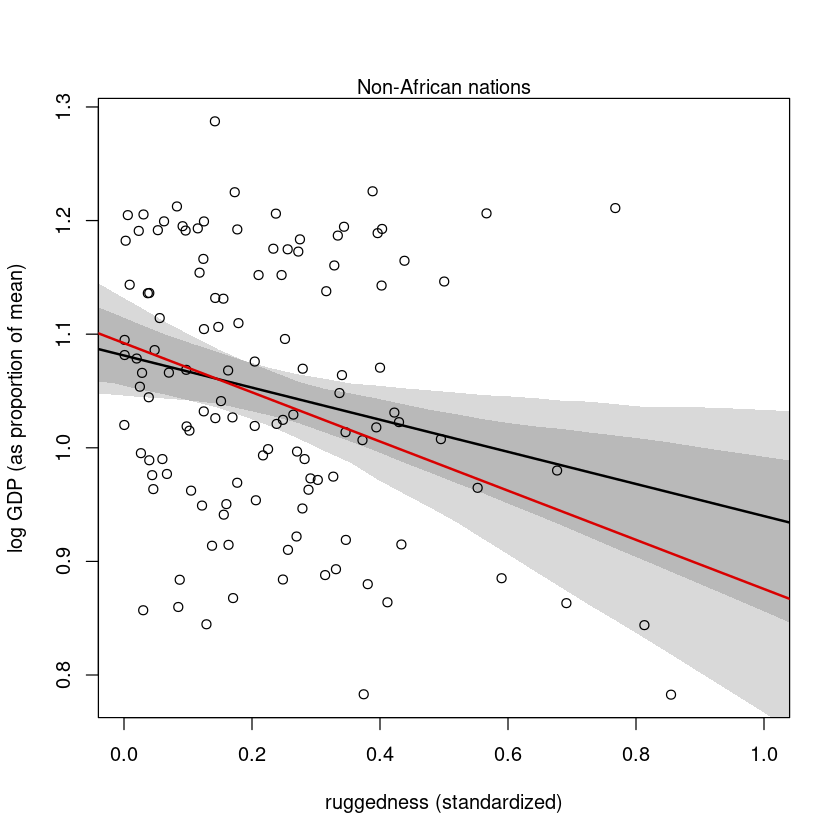

In [33]:
# plot non-Africa - cid=2
d.A0 <- dd[ dd$cid==2 , ]
plot( d.A0$rugged_std , d.A0$log_gdp_std , pch=1 , col="black" ,
    xlab="ruggedness (standardized)" , ylab="log GDP (as proportion of mean)" ,
    xlim=c(0,1) )
mu <- link( m8.3 , data=data.frame( cid=2 , rugged_std=rugged_seq ) )
mu_mean <- apply( mu , 2 , mean )
mu_ci <- apply( mu , 2 , PI , prob=0.97 )
mu_r <- link( m_robust , data=data.frame( cid=2 , rugged_std=rugged_seq ) )
mu_mean_r <- apply( mu_r , 2 , mean )
mu_ci_r <- apply( mu_r , 2 , PI , prob=0.97 )
lines( rugged_seq , mu_mean , lwd=2 )
shade( mu_ci , rugged_seq )
lines( rugged_seq , mu_mean_r , lwd=2, col = 'red' )
shade( mu_ci_r, rugged_seq)
mtext("Non-African nations")

Both robust fits now are less heavily influenced by the outliers in the sparse region

### 8H4
open ended

### 8H5.

Consider the data(Wines2012) data table. These data are expert ratings of 20 different French
and American wines by 9 different French and American judges. Your goal is to model score, the
subjective rating assigned by each judge to each wine. I recommend standardizing it. In this problem,
consider only variation among judges and wines. Construct index variables of judge and wine and
then use these index variables to construct a linear regression model. Justify your priors. You should
end up with 9 judge parameters and 20 wine parameters. How do you interpret the variation among
individual judges and individual wines? Do you notice any patterns, just by plotting the differences?
Which judges gave the highest/lowest ratings? Which wines were rated worst/best on average?

In [34]:
data(Wines2012)

In [35]:
d <- Wines2012

In [36]:
head(d)

,judge,flight,wine,score,wine.amer,judge.amer
,<fct>,<fct>,<fct>,<dbl>,<int>,<int>
1,Jean-M Cardebat,white,A1,10,1,0
2,Jean-M Cardebat,white,B1,13,1,0
3,Jean-M Cardebat,white,C1,14,0,0
4,Jean-M Cardebat,white,D1,15,0,0
5,Jean-M Cardebat,white,E1,8,1,0
6,Jean-M Cardebat,white,F1,13,1,0


In [37]:
d$score_std <- standardize(d$score)

In [38]:
unique(d$judge)

[1] Jean-M Cardebat Tyler Colman    John Foy        Olivier Gergaud
[5] Robert Hodgson  Linda Murphy    Daniele Meulder Jamal Rayyis   
[9] Francis Schott 
9 Levels: Daniele Meulder Francis Schott Jamal Rayyis ... Tyler Colman

In [39]:
d$judge_id <- as.integer(d$judge)

In [40]:
d$wine_id <- as.integer(d$wine)

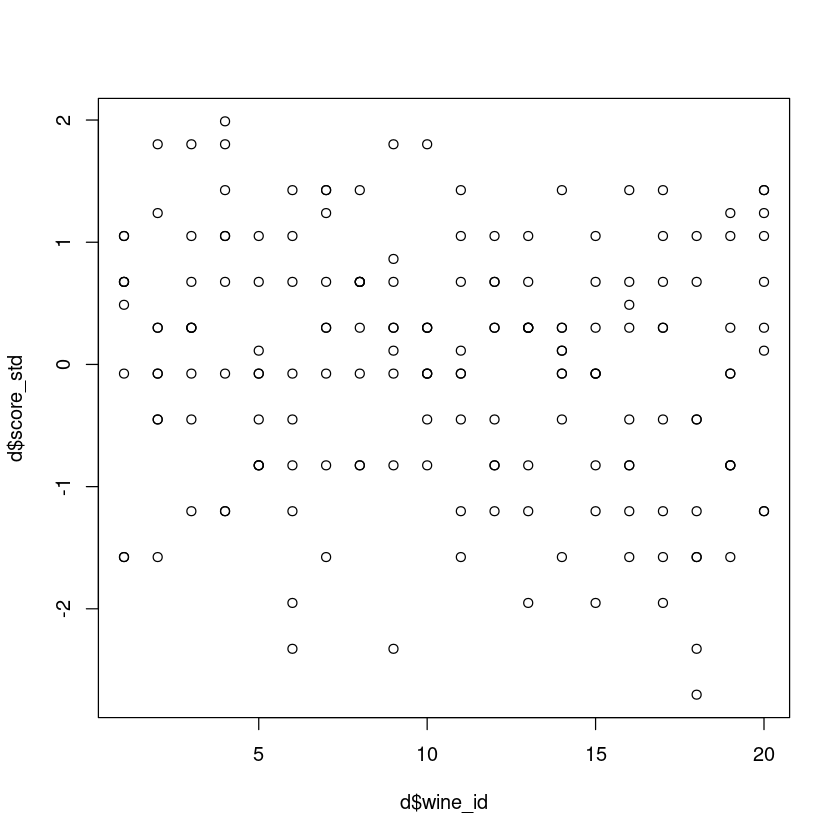

In [41]:
plot(d$wine_id, d$score_std)

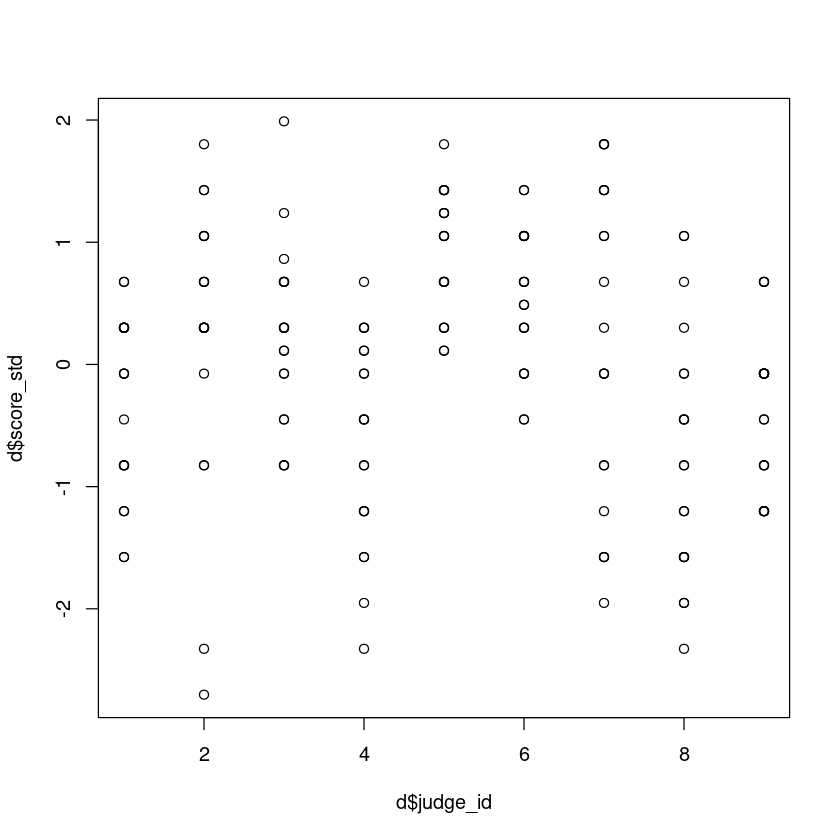

In [42]:
plot(d$judge_id, d$score_std)

some judges have a large spread, some don't. some gives above average ratings (like 3, 5, 6)

In [43]:
m_wine <- quap(
    alist(
        score_std ~ dnorm(mu, sigma), 
        mu <- a[wine_id] + b[judge_id],
        a[wine_id] ~ dnorm(0, 1),
        b[judge_id] ~ dnorm(0, 1),
        sigma ~ exp(1)
        ),data =d)

So the prior is a bit broad here. I am not familiar with R to do some groupby + descriptive statistics and I'm not going to do this here because R isn't my main language. 1 is pretty high as a standard deviation, but it's probably okay when we inspect the histogram 

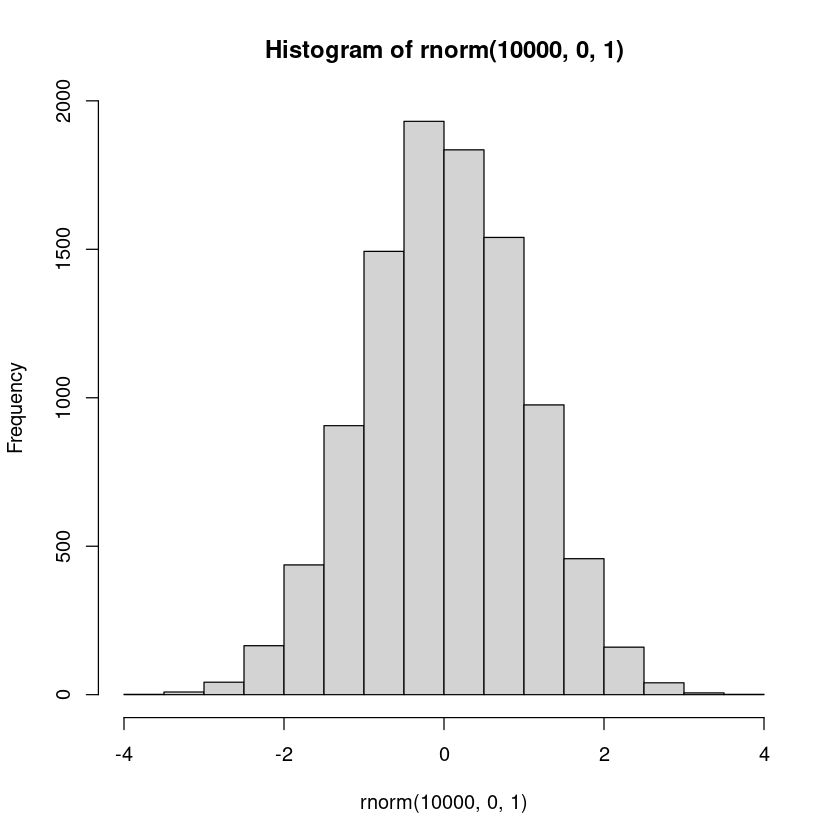

In [44]:
hist(rnorm(1e4,0,1))

here majority of the weight is concentrated between -2 and 2

In [45]:
precis(m_wine, depth=2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a[1],0.084731556,0.6826009,-1.0061966,1.1756597
a[2],0.061825964,0.6826009,-1.0291022,1.1527541
a[3],0.164908291,0.6826009,-0.9260199,1.2558364
a[4],0.336706480,0.6826009,-0.7542217,1.4276346
a[5],-0.075602362,0.6826009,-1.1665305,1.0153258
a[6],-0.224465234,0.6826009,-1.3153934,0.8664629
a[7],0.176372688,0.6826009,-0.9145555,1.2673008
a[8],0.164925322,0.6826009,-0.9260028,1.2558535
a[9],0.050391358,0.6826009,-1.0405368,1.1413195


best wine seems to be 20, worst wine seems to be 18

In [46]:
d[d$wine_id==20,]

,judge,flight,wine,score,wine.amer,judge.amer,score_std,judge_id,wine_id
,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<dbl>,<int>,<int>
100,Jean-M Cardebat,red,J2,14.5,0,0,0.1126146,4,20
110,Tyler Colman,red,J2,11.0,0,1,-1.2012222,9,20
120,John Foy,red,J2,17.5,0,1,1.2387604,5,20
130,Olivier Gergaud,red,J2,18.0,0,0,1.4264513,7,20
140,Robert Hodgson,red,J2,11.0,0,1,-1.2012222,8,20
150,Linda Murphy,red,J2,18.0,0,1,1.4264513,6,20
160,Daniele Meulder,red,J2,15.0,0,0,0.3003055,1,20
170,Jamal Rayyis,red,J2,16.0,0,0,0.6756875,3,20
180,Francis Schott,red,J2,17.0,0,1,1.0510694,2,20


In [47]:
d[d$wine_id==18,]

,judge,flight,wine,score,wine.amer,judge.amer,score_std,judge_id,wine_id
,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<dbl>,<int>,<int>
99,Jean-M Cardebat,red,I2,10,1,0,-1.5766041,4,18
109,Tyler Colman,red,I2,13,1,1,-0.4504583,9,18
119,John Foy,red,I2,17,1,1,1.0510694,5,18
129,Olivier Gergaud,red,I2,11,1,0,-1.2012222,7,18
139,Robert Hodgson,red,I2,8,1,1,-2.3273680,8,18
149,Linda Murphy,red,I2,13,1,1,-0.4504583,6,18
159,Daniele Meulder,red,I2,10,1,0,-1.5766041,1,18
169,Jamal Rayyis,red,I2,16,1,0,0.6756875,3,18
179,Francis Schott,red,I2,7,1,1,-2.7027499,2,18


judge 5 gives highest ratings, judge 8 gives the lowest, this makes sense from the plot

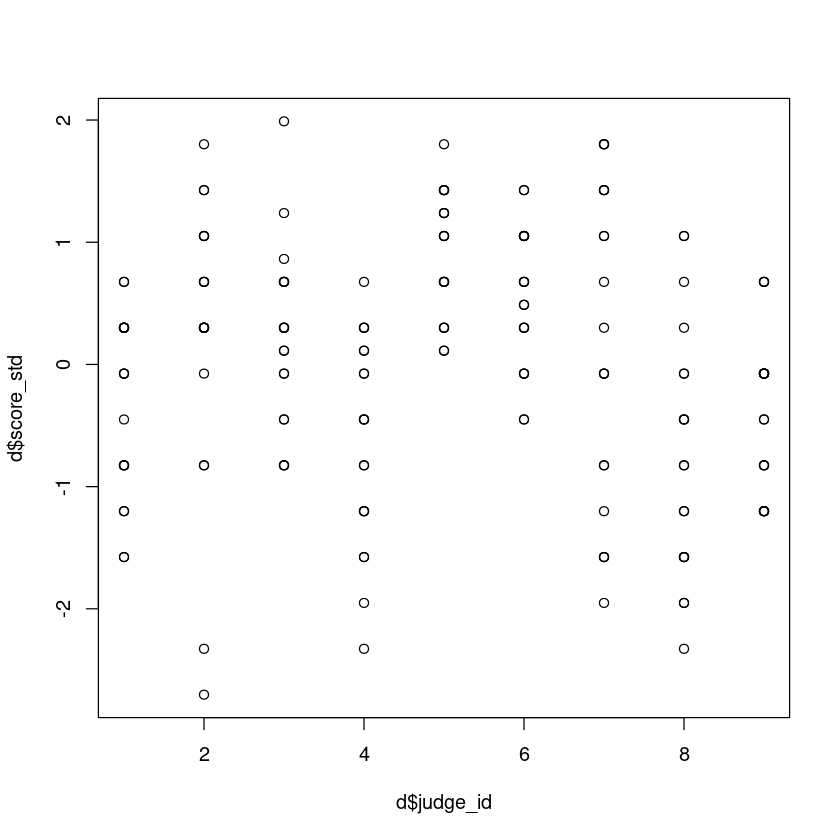

In [48]:
plot(d$judge_id, d$score_std)

### 8H6.

Now consider three features of the wines and judges:

(1) flight: Whether the wine is red or white.

(2) wine.amer: Indicator variable for American wines.

(3) judge.amer: Indicator variable for American judges.

Use indicator or index variables to model the influence of these features on the scores. Omit the
individual judge and wine index variables from Problem 1. Do not include interaction effects yet.
Again justify your priors. What do you conclude about the differences among the wines and judges?
Try to relate the results to the inferences in the previous problem.

In [51]:
d$flight_id <- as.integer(d$flight)

In [56]:
head(d)

,judge,flight,wine,score,wine.amer,judge.amer,score_std,judge_id,wine_id,flight_id
,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,Jean-M Cardebat,white,A1,10,1,0,-1.57660412,4,1,2
2,Jean-M Cardebat,white,B1,13,1,0,-0.45045832,4,3,2
3,Jean-M Cardebat,white,C1,14,0,0,-0.07507639,4,5,2
4,Jean-M Cardebat,white,D1,15,0,0,0.30030555,4,7,2
5,Jean-M Cardebat,white,E1,8,1,0,-2.32736799,4,9,2
6,Jean-M Cardebat,white,F1,13,1,0,-0.45045832,4,11,2


In [68]:
d$flight_id

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [61]:
length(d$wine.amer)

[1] 180

In [63]:
length(d$flight_id)

[1] 180

In [71]:
m_wine_amer <- quap(
    alist(
        score_std ~ dnorm(mu, sigma), 
        mu <- a[flight_id]+b[wine.amer]+c[judge.amer],
        a[flight_id] ~ dnorm(0, 0.5),
        b[wine.amer] ~ dnorm(0, 0.5),
        c[judge.amer] ~ dnorm(0, 0.5),
        sigma ~ exp(1)
        ),data =d)

Warning message in a[flight_id] + b[wine.amer]:
“longer object length is not a multiple of shorter object length”
Warning message in a[flight_id] + b[wine.amer] + c[judge.amer]:
“longer object length is not a multiple of shorter object length”


In [72]:
precis(m_wine_amer, depth=2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a[1],-1.563785e-03,0.3639269,-0.5831893,0.5800618
a[2],1.577098e-03,0.3639269,-0.5800485,0.5832027
b[1],1.847538e-06,0.3951750,-0.6315641,0.6315677
b[2],-3.755239e-06,0.5000000,-0.7991003,0.7990928
c[1],-8.045149e-06,0.3951750,-0.6315739,0.6315579
c[2],-2.780419e-06,0.5000000,-0.7990993,0.7990938


There seems to have no effect for whether the wine was American or the Judge is American, and very little effect from the white/red

### 8H7.

Now consider two-way interactions among the three features. You should end up with three
different interaction terms in your model. These will be easier to build, if you use indicator variables.
Again justify your priors. Explain what each interaction means. Be sure to interpret the model’s
predictions on the outcome scale (mu, the expected score), not on the scale of individual parameters.
You can use link to help with this, or just use your knowledge of the linear model instead. What do
you conclude about the features and the scores? Can you relate the results of your model(s) to the
individual judge and wine inferences from 8H5?

In [83]:
m_wine_amer_int <- quap(
    alist(
        score_std ~ dnorm(mu, sigma), 
        mu <- a[flight_id]+b[wine.amer]+c[judge.amer]+gamma*flight_id*wine.amer + delta*flight_id*judge.amer + omicron*judge.amer*wine.amer, 
        a[flight_id] ~ dnorm(0, 0.5),
        b[wine.amer] ~ dnorm(0, 0.5),
        c[judge.amer] ~ dnorm(0, 0.5),
        gamma ~ dnorm(0, 0.5),
        delta ~ dnorm(0, 0.5),
        omicron ~ dnorm(0, 0.5),
        sigma ~ exp(1)
        ),data =d)

Warning message in a[flight_id] + b[wine.amer]:
“longer object length is not a multiple of shorter object length”
Warning message in a[flight_id] + b[wine.amer] + c[judge.amer]:
“longer object length is not a multiple of shorter object length”


In [84]:
precis(m_wine_amer_int, depth=3)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a[1],5.274003e-03,0.3659492,-0.5795835,0.5901316
a[2],-2.502656e-02,0.3847280,-0.6398963,0.5898431
b[1],-1.975296e-02,0.4074165,-0.6708831,0.6313772
b[2],1.318879e-08,0.5000000,-0.7990966,0.7990966
c[1],-1.975328e-02,0.4074165,-0.6708835,0.6313769
c[2],2.586678e-07,0.5000000,-0.7990963,0.7990968
gamma,-3.898442e-02,0.2406701,-0.4236218,0.3456529
delta,1.220627e-01,0.2436336,-0.2673109,0.5114362
omicron,-4.202046e-02,0.3846534,-0.6567709,0.5727299


main interaction is delta which is flight * judge.amer, but generally, not a lot of predicative power